## Análise Exploratória

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/Estudo data science/Machine learning/Aula Diego/Trabalho 1/Dados/Bruto/merged_2015.csv')
df = pd.read_csv('../../dados/brutos/merged_2015.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.describe()

,NU_ANO,CO_UF_ESCOLA,CO_MUNICIPIO_ESCOLA,CO_ESCOLA_EDUCACENSO,TP_DEPENDENCIA_ADM_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_CH,NU_MEDIA_LP,NU_MEDIA_MT,NU_MEDIA_RED,NU_MEDIA_OBJ,NU_MEDIA_TOT,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,NU_ANO_CENSO,TP_SITUACAO_FUNCIONAMENTO,CO_REGIAO,CO_MESORREGIAO,CO_MICRORREGIAO,CO_UF,CO_MUNICIPIO,CO_DISTRITO,TP_DEPENDENCIA,TP_LOCALIZACAO,TP_CATEGORIA_ESCOLA_PRIVADA,IN_CONVENIADA_PP,TP_CONVENIO_PODER_PUBLICO,IN_MANT_ESCOLA_PRIVADA_EMP,IN_MANT_ESCOLA_PRIVADA_ONG,IN_MANT_ESCOLA_PRIVADA_SIND,IN_MANT_ESCOLA_PRIVADA_SIST_S,IN_MANT_ESCOLA_PRIVADA_S_FINS,...,IN_FUNDAMENTAL_CICLOS,TP_LOCALIZACAO_DIFERENCIADA,IN_MATERIAL_ESP_QUILOMBOLA,IN_MATERIAL_ESP_INDIGENA,IN_MATERIAL_ESP_NAO_UTILIZA,IN_EDUCACAO_INDIGENA,TP_INDIGENA_LINGUA,CO_LINGUA_INDIGENA,IN_BRASIL_ALFABETIZADO,IN_FINAL_SEMANA,IN_FORMACAO_ALTERNANCIA,IN_MEDIACAO_PRESENCIAL,IN_MEDIACAO_SEMIPRESENCIAL,IN_MEDIACAO_EAD,IN_ESPECIAL_EXCLUSIVA,IN_REGULAR,IN_EJA,IN_PROFISSIONALIZANTE,IN_COMUM_CRECHE,IN_COMUM_PRE,IN_COMUM_FUND_AI,IN_COMUM_FUND_AF,IN_COMUM_MEDIO_MEDIO,IN_COMUM_MEDIO_INTEGRADO,IN_COMUM_MEDIO_NORMAL,IN_ESP_EXCLUSIVA_CRECHE,IN_ESP_EXCLUSIVA_PRE,IN_ESP_EXCLUSIVA_FUND_AI,IN_ESP_EXCLUSIVA_FUND_AF,IN_ESP_EXCLUSIVA_MEDIO_MEDIO,IN_ESP_EXCLUSIVA_MEDIO_INTEGR,IN_ESP_EXCLUSIVA_MEDIO_NORMAL,IN_COMUM_EJA_FUND,IN_COMUM_EJA_MEDIO,IN_COMUM_EJA_PROF,IN_ESP_EXCLUSIVA_EJA_FUND,IN_ESP_EXCLUSIVA_EJA_MEDIO,IN_ESP_EXCLUSIVA_EJA_PROF,IN_COMUM_PROF,IN_ESP_EXCLUSIVA_PROF
count,15598.0,15598.000000,1.559800e+04,1.559800e+04,15598.000000,15598.000000,15598.000000,15598.000000,15598.00000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,0.0,0.0,15579.000000,15598.000000,15516.000000,15516.000000,15516.000000,15598.0,15598.0,15598.000000,15598.000000,15598.000000,15598.000000,1.559800e+04,1.559800e+04,15598.000000,15598.000000,6325.000000,6325.000000,598.000000,6325.000000,6325.000000,6325.000000,6325.000000,6325.000000,...,11666.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,17.000000,4.000000,15598.000000,15598.000000,15598.000000,15598.0,15598.000000,15598.000000,15598.000000,15598.0,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.0,15598.000000,15598.000000,15598.000000,15598.000000,15598.000000,15598.0,15598.000000,15598.0
mean,2015.0,33.143608,3.330882e+06,3.327456e+07,2.796961,1.036223,85.465765,0.553533,62.53026,76.143559,490.865533,566.760296,515.310694,492.569628,563.765700,NaN,NaN,60.393125,76.322300,87.416177,8.798079,3.785744,2015.0,1.0,2.964803,3319.857866,33165.563213,33.143608,3.330882e+06,3.330882e+08,2.796961,1.036223,1.437628,0.094545,1.837793,0.757945,0.009328,0.054545,0.047747,0.200316,...,0.300874,0.015899,0.002885,0.001859,0.995256,0.001090,2.117647,175.000000,0.013207,0.198038,0.040454,1.0,0.000833,0.020259,0.006668,1.0,0.251250,0.156046,0.202847,0.266829,0.436594,0.744839,0.960508,0.069432,0.035581,0.000064,0.000128,0.004488,0.000513,0.000641,0.000256,0.0,0.105398,0.231312,0.016412,0.001218,0.000192,0.0,0.101039,0.0
std,0.0,9.272119,9.286838e+05,9.260374e+06,1.007441,0.186850,83.905615,1.325878,61.90255,15.382843,47.407539,40.158736,41.882286,69.048083,77.888398,NaN,NaN,17.222157,50.037961,10.952789,7.915180,5.557789,0.0,0.0,1.010164,927.626516,9273.805933,9.272119,9.286838e+05,9.286838e+07,1.007441,0.186850,1.037915,0.292609,0.762683,0.428361,0.096138,0.227109,0.213247,0.400269,...,0.458658,0.237269,0.053636,0.043080,0.068717,0.032996,0.485071,112.267538,0.114163,0.398534,0.197028,0.0,0.028858,0.140890,0.081385,0.0,0.433746,0.362910,0.402132,0.442316,0.495979,0.435966,0.194769,0.254195,0.185250,0.008007,0.011323,0.066842,0.022642,0.025313,0.016012,0.0,0.307076,0.421685,0.127059,0.034881,0.013868,0.0,0.301389,

In [5]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

NU_MEDIA_OBJ                     15598
NU_MEDIA_TOT                     15598
CO_LINGUA_INDIGENA               15594
CO_ESCOLA_SEDE_VINCULADA         15590
TP_INDIGENA_LINGUA               15581
TP_OCUPACAO_GALPAO               15562
CO_IES_OFERTANTE                 15540
TP_CONVENIO_PODER_PUBLICO        15000
TP_CATEGORIA_ESCOLA_PRIVADA       9273
IN_CONVENIADA_PP                  9273
IN_MANT_ESCOLA_PRIVADA_EMP        9273
IN_MANT_ESCOLA_PRIVADA_ONG        9273
IN_MANT_ESCOLA_PRIVADA_SIND       9273
IN_MANT_ESCOLA_PRIVADA_SIST_S     9273
IN_MANT_ESCOLA_PRIVADA_S_FINS     9273
IN_FUNDAMENTAL_CICLOS             3932
CO_ORGAO_REGIONAL                  744
TP_OCUPACAO_PREDIO_ESCOLAR         109
IN_PREDIO_COMPARTILHADO            102
NU_TAXA_ABANDONO                    82
NU_TAXA_REPROVACAO                  82
NU_TAXA_APROVACAO                   82
NU_SALAS_EXISTENTES                 24
PC_FORMACAO_DOCENTE                 19
INSE                                 1
dtype: int64

## Distribuição das dependências administrativas

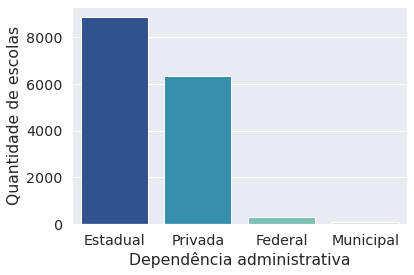

In [36]:
aux = df.copy()
tipo_map = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
aux['TP_DEPENDENCIA'] = aux['TP_DEPENDENCIA'].map(tipo_map)
ordem = [tipo_map[2], tipo_map[4], tipo_map[1], tipo_map[3]]

# plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
plt.tight_layout()
escolas_plt = sns.countplot(x='TP_DEPENDENCIA', data=aux, order=ordem, palette='YlGnBu_r')
escolas_plt.set(xlabel='Dependência administrativa', ylabel='Quantidade de escolas')

plt.savefig('../../graficos/analise/countplot_dist_dep.pdf')

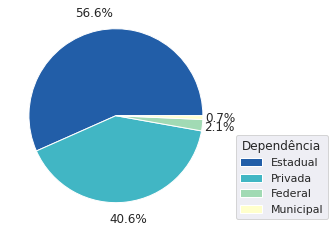

In [7]:
cores = ['#225ea8', '#41b6c4', '#a1dab4', '#ffffcc']

plt.tight_layout()
sns.set(font_scale=1)
plt.pie(df['TP_DEPENDENCIA'].value_counts(), colors=cores,
        autopct='%1.1f%%', pctdistance=1.2)
plt.legend(['Estadual', 'Privada', 'Federal', 'Municipal'], title='Dependência',
           loc='lower right', bbox_to_anchor=(1, 0, 0.5, 1))

plt.subplots_adjust(left=0.0)
plt.savefig('../../graficos/analise/pizza_dist_dep.pdf')

## Distribuição das notas do Enem

- CN: Ciências da Natureza e suas Tecnologias
- CH: Ciências Humanas e suas Tecnologias
- LP: Linguagens, Códigos e suas Tecnologias
- MT: Matemática e suas Tecnologias
- RED: Redação

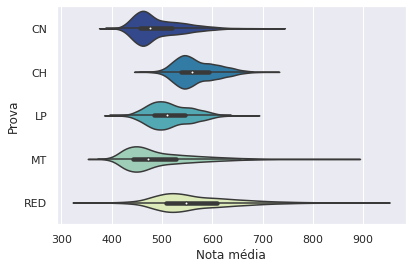

In [8]:
fig = sns.violinplot(x='value', y='variable',
                  data=df[['NU_MEDIA_CN', 'NU_MEDIA_CH',
                           'NU_MEDIA_LP', 'NU_MEDIA_MT',
                           'NU_MEDIA_RED']].rename(columns={
                               'NU_MEDIA_CN':'CN',
                               'NU_MEDIA_CH':'CH',
                               'NU_MEDIA_LP':'LP',
                               'NU_MEDIA_MT':'MT',
                               'NU_MEDIA_RED':'RED'
                           }).melt(),
                  palette='YlGnBu_r')
sns.set(font_scale=1.2)
plt.tight_layout()
fig.set(xlabel='Nota média', ylabel='Prova')

plt.savefig('../../graficos/analise/violinplot_dist_notas.pdf')

Desvio padrão para cada matéria.

In [9]:
df[['NU_MEDIA_CN', 'NU_MEDIA_CH','NU_MEDIA_LP', 'NU_MEDIA_MT','NU_MEDIA_RED']].std()

NU_MEDIA_CN     47.407539
NU_MEDIA_CH     40.158736
NU_MEDIA_LP     41.882286
NU_MEDIA_MT     69.048083
NU_MEDIA_RED    77.888398
dtype: float64

## Distribuição das notas de redação

<Figure size 432x288 with 0 Axes>

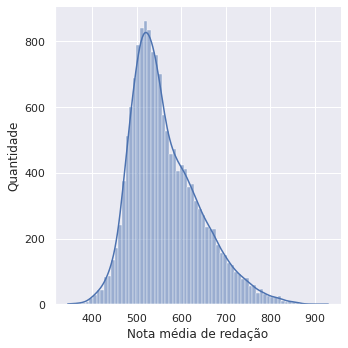

In [39]:
sns.set(font_scale=1)
plt.tight_layout()
fig = sns.displot(data=df, x='NU_MEDIA_RED', kde=True)
fig.set(xlabel='Nota média de redação', ylabel='Quantidade')

plt.savefig('../../graficos/analise/dist_red.pdf')

## Correlação e mapa de calor para a nota de redação

In [12]:
corr_cols = df.drop(['NU_MEDIA_MT',
                     'NU_MEDIA_LP',
                     'NU_MEDIA_CH',
                     'NU_MEDIA_CN',
                     'TP_DEPENDENCIA',
                     'TP_DEPENDENCIA_ADM_ESCOLA',
                     'CO_LINGUA_INDIGENA'], axis=1).corr()['NU_MEDIA_RED'].abs().sort_values(ascending = False)[:10].index

corr = df[corr_cols].corr()
corr['NU_MEDIA_RED']

NU_MEDIA_RED            1.000000
NU_TAXA_PARTICIPACAO    0.651642
IN_ALIMENTACAO         -0.628017
NU_TAXA_ABANDONO       -0.446809
IN_COMUM_PRE            0.444731
IN_PARQUE_INFANTIL      0.421398
IN_COMUM_CRECHE         0.419570
IN_BANHEIRO_EI          0.416599
NU_TAXA_APROVACAO       0.413681
IN_COMUM_FUND_AI        0.332686
Name: NU_MEDIA_RED, dtype: float64

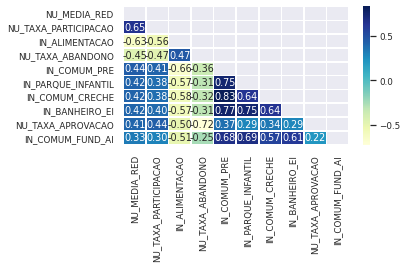

In [13]:
sns.set(font_scale=0.8)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='YlGnBu', mask=mask, linewidths=.5, annot=True, fmt=".2f")
sns.set(font_scale=1.3)
plt.tight_layout()
plt.savefig('../../graficos/analise/heatmap.pdf')

Gráficos da nota de redação com as variáveis contínuas de maior correlação:

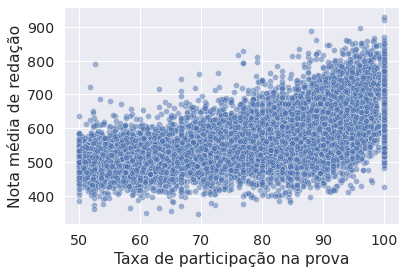

In [31]:
sns.set(font_scale=1.2)
plt.tight_layout()

fig = sns.scatterplot(x='NU_TAXA_PARTICIPACAO', y='NU_MEDIA_RED', data=df, alpha=0.5)
fig.set(xlabel='Taxa de participação na prova', ylabel='Nota média de redação')

plt.savefig('../../graficos/analise/scatter_particip_red.pdf')

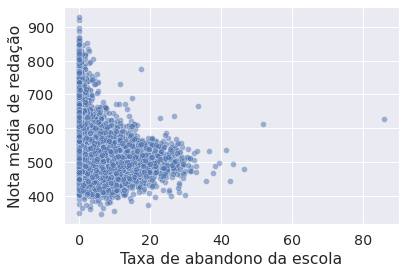

In [32]:
sns.set(font_scale=1.2)
plt.tight_layout()

fig = sns.scatterplot(x='NU_TAXA_ABANDONO', y='NU_MEDIA_RED', data=df, alpha=0.5)
fig.set(xlabel='Taxa de abandono da escola', ylabel='Nota média de redação')

plt.savefig('../../graficos/analise/scatter_abandon_red.pdf')

## Distribuição da nota média de redação em categorias

### Dependência administrativa

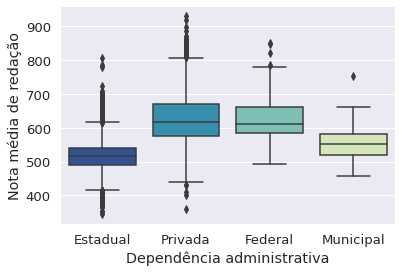

In [38]:
aux = df.copy()
tipo_map = {
    1: 'Federal',
    2: 'Estadual',
    3: 'Municipal',
    4: 'Privada'
}
aux.loc[:,'TP_DEPENDENCIA'] = aux['TP_DEPENDENCIA'].map(tipo_map)
ordem = [tipo_map[2], tipo_map[4], tipo_map[1], tipo_map[3]]

# plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
plt.tight_layout()
fig = sns.boxplot(x='TP_DEPENDENCIA', y='NU_MEDIA_RED', data=aux, order=ordem, palette='YlGnBu_r')
fig.set(xlabel='Dependência administrativa', ylabel='Nota média de redação')

plt.savefig('../../graficos/analise/boxplot_dep_red.pdf')

### Região

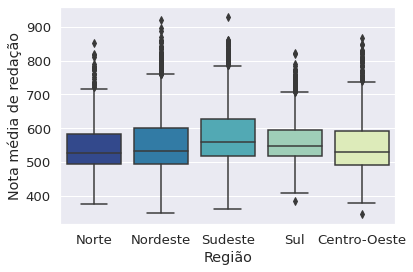

In [21]:
aux = df.copy()
regiao_map = {
    1: 'Norte',
    2: 'Nordeste',
    3: 'Sudeste',
    4: 'Sul',
    5: 'Centro-Oeste'
}
aux.loc[:,'CO_REGIAO'] = aux['CO_REGIAO'].map(regiao_map)

sns.set(font_scale=1.2)
plt.tight_layout()
fig = sns.boxplot(data=aux, x='CO_REGIAO', y='NU_MEDIA_RED', palette='YlGnBu_r')
fig.set(xlabel='Região', ylabel='Nota média de redação')

plt.savefig('../../graficos/analise/boxplot_regiao_red.pdf')

### Alimentação

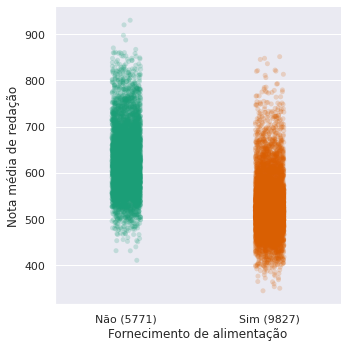

In [24]:
aux = df.copy()
alim_map = {
    0: 'Não ({})'.format(df['IN_ALIMENTACAO'].value_counts()[0]),
    1: 'Sim ({})'.format(df['IN_ALIMENTACAO'].value_counts()[1])
}
aux.loc[:,'IN_ALIMENTACAO'] = aux['IN_ALIMENTACAO'].map(alim_map)

sns.set(font_scale=1)
sns.set_style('darkgrid')
fig = sns.catplot(x='IN_ALIMENTACAO', y='NU_MEDIA_RED', data=aux, alpha=0.2, palette='Dark2')
fig.set(xlabel='Fornecimento de alimentação', ylabel='Nota média de redação')
fig.tight_layout()

plt.savefig('../../graficos/analise/catplot_alim_red.pdf')

### Água

<Figure size 432x288 with 0 Axes>

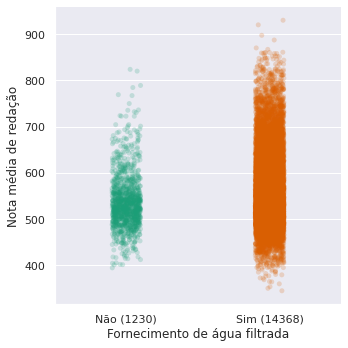

In [25]:
aux = df.copy()
agua_map = {
    0: 'Não ({})'.format(df['IN_AGUA_FILTRADA'].value_counts()[0]),
    1: 'Sim ({})'.format(df['IN_AGUA_FILTRADA'].value_counts()[1])
}
aux.loc[:,'IN_AGUA_FILTRADA'] = aux['IN_AGUA_FILTRADA'].map(agua_map)
ordem = [agua_map[0], agua_map[1]]

# sns.set(font_scale=1)
plt.tight_layout()

fig = sns.catplot(x='IN_AGUA_FILTRADA', y='NU_MEDIA_RED', data=aux, alpha=0.2, order=ordem, palette='Dark2')
fig.set(xlabel='Fornecimento de água filtrada', ylabel='Nota média de redação')
fig.tight_layout()
plt.savefig('../../graficos/analise/catplot_agua_red.pdf')

<Figure size 432x288 with 0 Axes>

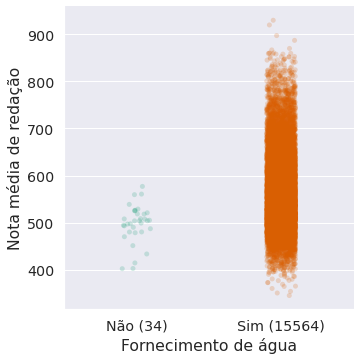

In [17]:
aux = df.copy()
agua_map = {
    1: 'Não ({})'.format(df['IN_AGUA_INEXISTENTE'].value_counts()[1]),
    0: 'Sim ({})'.format(df['IN_AGUA_INEXISTENTE'].value_counts()[0])
}
aux.loc[:,'IN_AGUA_INEXISTENTE'] = aux['IN_AGUA_INEXISTENTE'].map(agua_map)
ordem = [agua_map[1], agua_map[0]]

sns.set(font_scale=1.3)
plt.tight_layout()

fig = sns.catplot(x='IN_AGUA_INEXISTENTE', y='NU_MEDIA_RED', data=aux, alpha=0.2, order=ordem, palette='Dark2')
fig.set(xlabel='Fornecimento de água', ylabel='Nota média de redação')

### Laboratório de ciências

<Figure size 432x288 with 0 Axes>

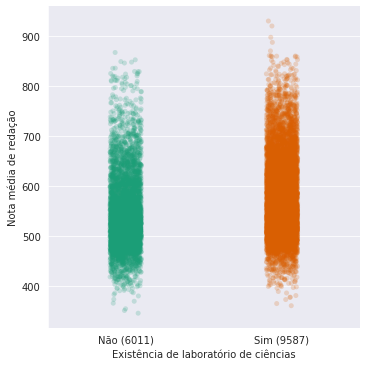

In [5]:
aux = df.copy()
ciencia_map = {
    0: 'Não ({})'.format(df['IN_LABORATORIO_CIENCIAS'].value_counts()[0]),
    1: 'Sim ({})'.format(df['IN_LABORATORIO_CIENCIAS'].value_counts()[1])
}
aux.loc[:,'IN_LABORATORIO_CIENCIAS'] = aux['IN_LABORATORIO_CIENCIAS'].map(ciencia_map)
ordem = [ciencia_map[0], ciencia_map[1]]

# sns.set(font_scale=1)
plt.tight_layout()

fig = sns.catplot(x='IN_LABORATORIO_CIENCIAS', y='NU_MEDIA_RED', data=aux, alpha=0.2, order=ordem, palette='Dark2')
fig.set(xlabel='Existência de laboratório de ciências', ylabel='Nota média de redação')

plt.savefig('../../graficos/analise/catplot_ciencia_red.pdf')

### Esgoto

<Figure size 432x288 with 0 Axes>

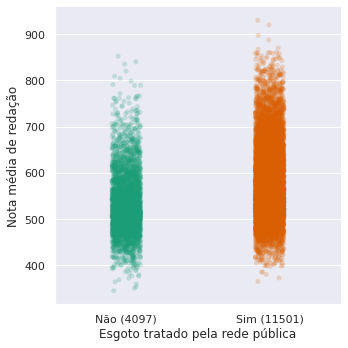

In [26]:
aux = df.copy()
esgoto_map = {
    0: 'Não ({})'.format(df['IN_ESGOTO_REDE_PUBLICA'].value_counts()[0]),
    1: 'Sim ({})'.format(df['IN_ESGOTO_REDE_PUBLICA'].value_counts()[1])
}
aux.loc[:,'IN_ESGOTO_REDE_PUBLICA'] = aux['IN_ESGOTO_REDE_PUBLICA'].map(esgoto_map)
ordem = [esgoto_map[0], esgoto_map[1]]

# sns.set(font_scale=1)
plt.tight_layout()

fig = sns.catplot(x='IN_ESGOTO_REDE_PUBLICA', y='NU_MEDIA_RED', data=aux, alpha=0.2, order=ordem, palette='Dark2')
fig.set(xlabel='Esgoto tratado pela rede pública', ylabel='Nota média de redação')
fig.tight_layout()
plt.savefig('../../graficos/analise/catplot_esgoto_red.pdf')

<Figure size 432x288 with 0 Axes>

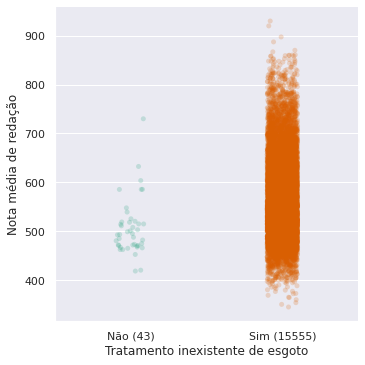

In [43]:
aux = df.copy()
esgoto_map = {
    1: 'Não ({})'.format(df['IN_ESGOTO_INEXISTENTE'].value_counts()[1]),
    0: 'Sim ({})'.format(df['IN_ESGOTO_INEXISTENTE'].value_counts()[0])
}
aux.loc[:,'IN_ESGOTO_INEXISTENTE'] = aux['IN_ESGOTO_INEXISTENTE'].map(esgoto_map)
ordem = [esgoto_map[1], esgoto_map[0]]

sns.set(font_scale=1)
plt.tight_layout()

fig = sns.catplot(x='IN_ESGOTO_INEXISTENTE', y='NU_MEDIA_RED', data=aux, alpha=0.2, order=ordem, palette='Dark2')
fig.set(xlabel='Tratamento inexistente de esgoto', ylabel='Nota média de redação')